In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from collections import Counter

## Please change the folder_name below

In [3]:
df_time = pd.read_csv('./10_30_1_time_result.csv')

In [4]:
df_time

Replicate               Gene_tree  reconcILSTime_iterative  dlcparTime  \
0            0                  (C,B);                 0.000715    1.187262   
1            1                  (A,C);                 0.000563    0.836029   
2            2          ((C,B),(B,A));                 0.061511    0.789126   
3            3                  (A,B);                 0.000494    0.842488   
4            4              ((C,B),A);                 0.000443    0.783206   
..         ...                     ...                      ...         ...   
894        995  (((B,B),C),((A,A),C));                 0.071232    1.185625   
895        996              ((A,A),B);                 0.001215    0.970361   
896        997              ((A,B),C);                 0.027441    0.809716   
897        998              (A,(C,B));                 0.000527    0.746368   
898        999              (A,(B,C));                 0.000414    0.739496   

     ete_time  
0    0.002167  
1    0.003762  
2    0.007515  
3    0.002068  
4    0.004324  
..        ...  
894  0.014422  
895  0.004720  
896  0.005056  
897  0.003647  
898  0.003958  

[899 rows x 5 columns]

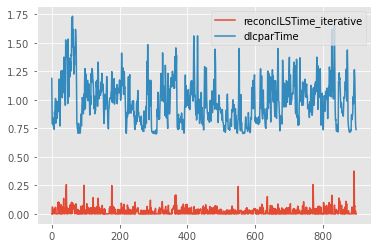

In [5]:
df_time[['reconcILSTime_iterative','dlcparTime']].plot()
plt.savefig('large_time.png')

In [6]:
df_time[['reconcILSTime_iterative','dlcparTime']].mean()



reconcILSTime_iterative    0.023811
dlcparTime                 0.992918
dtype: float64

In [7]:
df_time[['reconcILSTime_iterative','dlcparTime']].std()

reconcILSTime_iterative    0.036285
dlcparTime                 0.192389
dtype: float64

### Please change the folder_name below

In [34]:
df = pd.read_csv('./zero_loss_1_result.csv')



In [9]:
df[df['Process']=='True Process'].mean()-df[df['Process']=='reconcILS'].mean()

/tmp/ipykernel_19524/4166849057.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Process']=='True Process'].mean()-df[df['Process']=='reconcILS'].mean()


Replicate      0.000000
Duplication    0.030030
NNI            0.193193
DLCILS         0.858859
Loss          -0.107107
Hemiplasy      0.000000
RHemiplasy     0.219219
dtype: float64

In [10]:
df[df['Process']=='True Process'].mean()-df[df['Process']=='ETE3'].mean()

/tmp/ipykernel_19524/3396449211.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Process']=='True Process'].mean()-df[df['Process']=='ETE3'].mean()


Replicate      0.000000
Duplication   -0.197197
NNI            0.976977
DLCILS         0.858859
Loss          -1.456456
Hemiplasy      0.000000
RHemiplasy     0.219219
dtype: float64

In [11]:
df[df['Process']=='True Process'].mean()-df[df['Process']=='DLCpar'].mean()

/tmp/ipykernel_19524/3379695683.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Process']=='True Process'].mean()-df[df['Process']=='DLCpar'].mean()


Replicate      0.000000
Duplication    0.070070
NNI            0.976977
DLCILS         0.328328
Loss          -0.324324
Hemiplasy      0.000000
RHemiplasy     0.219219
dtype: float64

In [12]:
df[df['Process']=='ETE3'].mean()

/tmp/ipykernel_19524/4004969890.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Process']=='ETE3'].mean()


Replicate      499.427427
Duplication      1.569570
NNI              0.000000
DLCILS           0.000000
Loss             1.456456
Hemiplasy        0.000000
RHemiplasy       0.000000
dtype: float64

In [13]:
df[df['Process']=='reconcILS'].mean()

/tmp/ipykernel_19524/1012434910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Process']=='reconcILS'].mean()


Replicate      499.427427
Duplication      1.342342
NNI              0.783784
DLCILS           0.000000
Loss             0.107107
Hemiplasy        0.000000
RHemiplasy       0.000000
dtype: float64

In [14]:
df[df['Process']=='DLCpar'].mean()

/tmp/ipykernel_19524/458226767.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Process']=='DLCpar'].mean()


Replicate      499.427427
Duplication      1.302302
NNI              0.000000
DLCILS           0.530531
Loss             0.324324
Hemiplasy        0.000000
RHemiplasy       0.000000
dtype: float64

In [15]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [16]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [17]:
dlc_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
dlc_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
dlc_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
dlc_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_dlc = pd.concat([dlc_Duplication,dlc_Loss],axis=1)

In [18]:
ete_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
#ete_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ete_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
#True_ete= pd.DataFrame(list(df[(df.Process == "ETE3")]['DLCILS']),columns=['DLCILS'])
concat_e = pd.concat([ete_Duplication,ete_Loss],axis=1)

#### concat_true_e

In [19]:
True_Duplication['Replicate']=[i for i in range(len(True_Duplication))]
O_Duplication['Replicate']=[i for i in range(len(True_Duplication))]
dlc_Duplication['Replicate']=[i for i in range(len(True_Duplication))]
ete_Duplication['Replicate']=[i for i in range(len(True_Duplication))]


In [20]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(len(True_Duplication))]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [21]:
true_dlc_dups= pd.DataFrame((concat_dlc-concat_true))
val =['DLCpar' for i in range(len(True_Duplication))]
true_dlc_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [22]:
true_ete_dups= pd.DataFrame((concat_e-concat_true))
val =['ete3' for i in range(len(True_Duplication))]
true_ete_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [24]:
new =pd.concat([true_reconils_dups,true_dlc_dups,true_ete_dups],axis=0)
new

Duplication  Loss  Algorithm
0              0     0  reconcILS
1              0     0  reconcILS
2              0     0  reconcILS
3              0     0  reconcILS
4              0     0  reconcILS
..           ...   ...        ...
994           -1     1       ete3
995            1     3       ete3
996            0     2       ete3
997            0     2       ete3
998            0     0       ete3

[2997 rows x 3 columns]

In [25]:
true_reconils_dups.mean(),true_reconils_dups.std()

/tmp/ipykernel_19524/3198282168.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  true_reconils_dups.mean(),true_reconils_dups.std()


(Duplication   -0.030030
 Loss           0.107107
 dtype: float64,
 Duplication    0.251447
 Loss           0.394780
 dtype: float64)

In [26]:
true_dlc_dups.mean(),true_dlc_dups.std()

/tmp/ipykernel_19524/3294525437.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  true_dlc_dups.mean(),true_dlc_dups.std()


(Duplication   -0.070070
 Loss           0.324324
 dtype: float64,
 Duplication    0.270632
 Loss           0.627460
 dtype: float64)

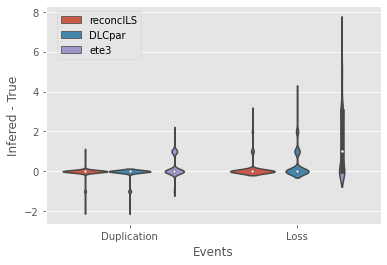

In [27]:
#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,1))
plt.ylabel("Infered - True")
plt.savefig('box_plot.jpg', dpi=500)
plt.savefig('zero_loss.png')


In [28]:
True_value =df[(df.Process == "True Process")][['Replicate','Duplication','NNI','DLCILS','Loss']]
dlcpar_value =df[(df.Process == "DLCpar")][['Process','Replicate','Duplication','NNI','DLCILS','Loss']]
reconcILS_value =df[(df.Process == "reconcILS")][['Process','Replicate','Duplication','NNI','DLCILS','Loss']]
True_value_1= True_value.merge(dlcpar_value, how='inner', on='Replicate')
True_value_2 =True_value_1.merge(reconcILS_value, how='left', on='Replicate')

#df_e = pd.concat([True_value, dlcpar_value,reconcILS_value], axis=0)
True_value_3 = pd.melt(True_value_2, id_vars=['Replicate','Process_x','Process_y'])
#print(df)

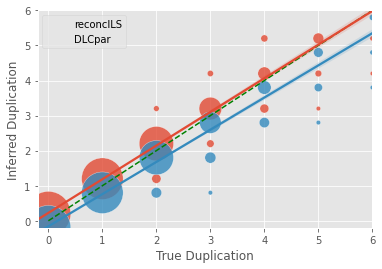

<Figure size 432x288 with 0 Axes>

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Concatenate and group the data
result1 = pd.concat([True_Duplication['Duplication'], O_Duplication['Duplication']], ignore_index=True, axis=1)
result11 = result1.groupby([0, 1]).size().reset_index(name='Count')

result12 = pd.concat([True_Duplication['Duplication'], dlc_Duplication['Duplication']], ignore_index=True, axis=1)
result22 = result12.groupby([0, 1]).size().reset_index(name='Count')

# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.2
#result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

#result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter

# Create the line
x = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]
y = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]
ax = plt.plot(x, y, '--', color='g')

# Plot the scatter plots
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)

# Show the regression plots
ax = sns.regplot(x=result1[0], y=result1[1], data=result1, marker="", truncate=False,fit_reg=True,   label='reconcILS')
ax = sns.regplot(x=result12[0], y=result12[1], data=result12, marker="", truncate=False,fit_reg=True, label='DLCpar')


plt.xlabel("True Duplication")
plt.ylabel("Inferred Duplication")

# Set the axis limits
ax.set_xlim(-0.2, 6)
ax.set_ylim(-0.2, 6)

plt.legend(bbox_to_anchor=(0.28, 1))

# Save the plot to a file
plt.savefig('regex_dups_small.png', dpi=500)

# Show the plot
plt.show()
plt.clf()


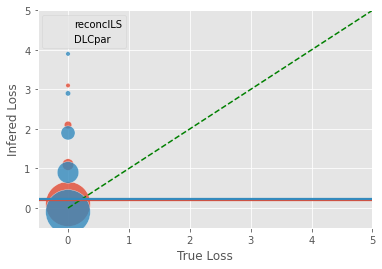

<Figure size 432x288 with 0 Axes>

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],dlc_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')

x = [0,1, 2, 3, 4, 5,6,7,8,9,10]
y = [0,1, 2, 3, 4, 5,6,7,8,9,10]



# Create the line
line = plt.plot(x, y, '--',color='g')


# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.1
#result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

#result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter

sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="", truncate=False,fit_reg=True, scatter_kws={'alpha':1}, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="",truncate=False,fit_reg=True,scatter_kws={'alpha':1}, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 5)
plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss_small.png', dpi=500)

plt.show()
plt.clf()

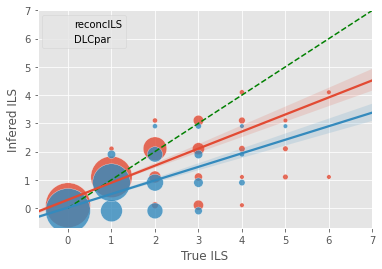

<Figure size 432x288 with 0 Axes>

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],dlc_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
x = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16]
y = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16]

# Create the line
line = plt.plot(x, y, '--',color='g')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);


# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.1
#result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

#result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter


sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="",truncate=False, fit_reg=True, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="",truncate=False,fit_reg=True, label='DLCpar')



plt.xlabel("True ILS")
plt.ylabel("Infered ILS")
# Show the plot
ax.set_xlim(-0.7, 7)
ax.set_ylim(-0.7, 7)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI_small.png', dpi=500)

plt.show()
plt.clf()

In [32]:
from scipy.stats import spearmanr
rho_dlcpar_loss, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss']))
rho_reconcils_loss, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['Loss']))
rho_dlcpar_dups, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['dups']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['dups']))
rho_reconcILS_dups, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['dups']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['dups']))
rho_dlcpar_NNI, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))
rho_reconcILS_NNI, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI']))

/home/gbob/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/gbob/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [33]:
print('Spearman R')
print('DLpar_Duplication:',rho_dlcpar_dups)
print('reconcILS_Duplication:',rho_reconcILS_dups)
print('DLpar_Loss:',rho_dlcpar_loss)
print('reconcILS_Loss:',rho_reconcils_loss)
print('DLpar_ILS:',rho_dlcpar_NNI)
print('reconcILS_NNI:',rho_reconcILS_NNI)



Spearman R
DLpar_Duplication: 0.9899796878656382
reconcILS_Duplication: 0.9933373322153416
DLpar_Loss: nan
reconcILS_Loss: nan
DLpar_ILS: 0.689695977962563
reconcILS_NNI: 0.8861888876986537
